## Stock Market Price Prediction via Standard Moving Average

#### Author : Han Yu 

#### TL;DR
* D[Stock Market Dataset from Kaggle](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)
* Methdology using the average of the stock close prices from the predefined time window to predict the next day's stock close price. 

### Import Library

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

### Default Setting

In [2]:
plt.rcParams['figure.figsize'] = [27.0, 9.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

In [3]:
gamma = 0.5 
window_size = 14

### Explore Data

In [4]:
df = pd.read_csv(os.path.join('./data/Stocks','googl.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close', 'Volume'])

In [5]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.000,52.03,47.980,50.170,44703800
1,2004-08-20,50.505,54.54,50.250,54.155,22857200
2,2004-08-23,55.375,56.74,54.525,54.700,18274400
3,2004-08-24,55.620,55.80,51.785,52.435,15262600
4,2004-08-25,52.480,54.00,51.940,53.000,9197800


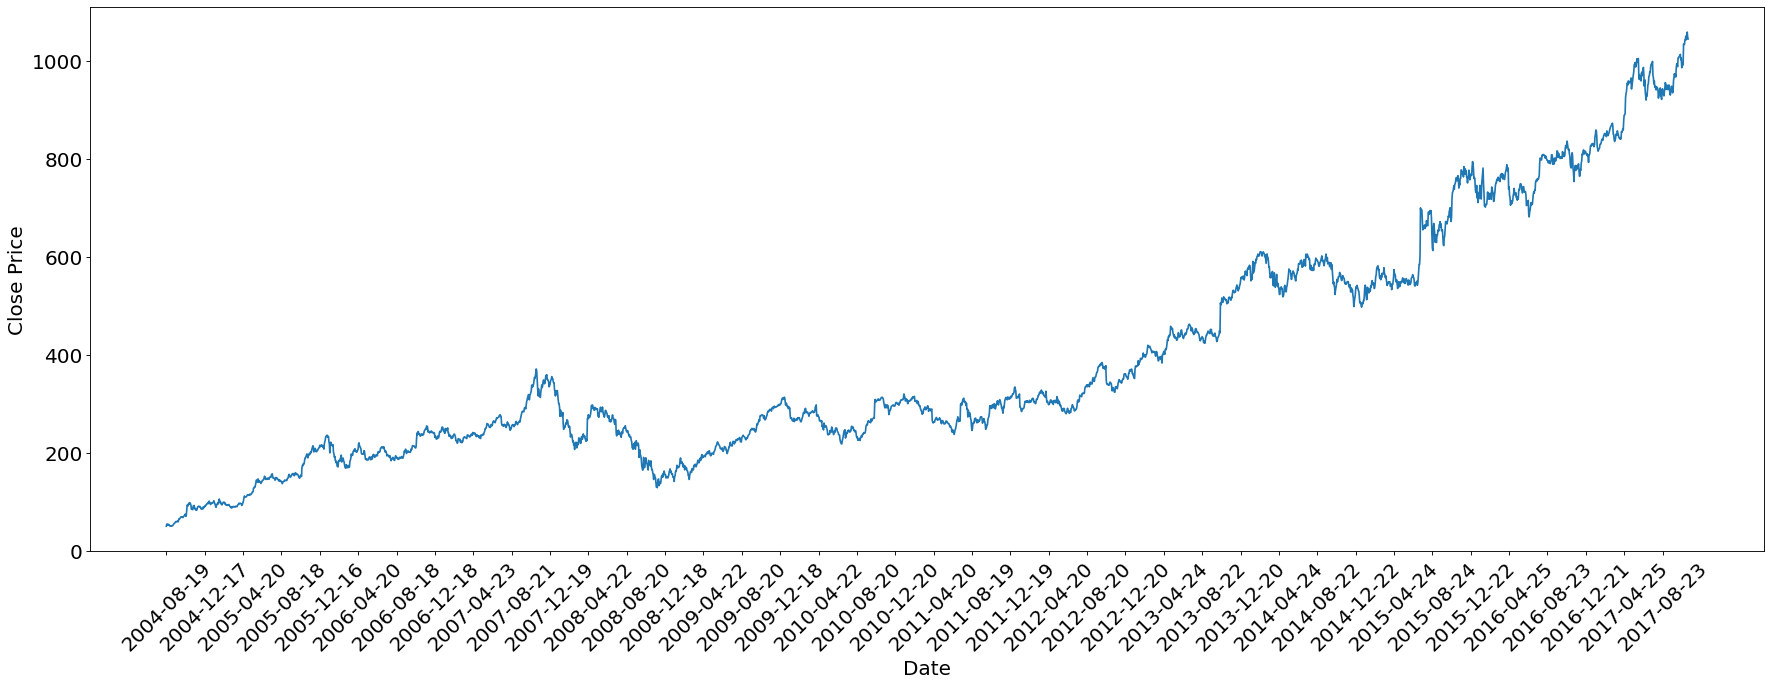

In [6]:
plt.plot(range(df.shape[0]),df['Close'])
plt.xticks(range(0,df.shape[0],28*3),df['Date'].loc[::28*3],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

### Prediction of Close Price via Simple Moving Average  

In [7]:
close_prices = np.array(df.loc[:,'Close']).reshape(-1,1)
sample_size = close_prices.shape[0]
num_feature = close_prices.shape[1]

train_data_portion = 1.0 

train_data = close_prices[0:int(sample_size * train_data_portion),:]
train_size = train_data.size

In [8]:
# Use Exponetial Moving Average to Smooth the Training Data
EMA = 0.0
for ti in range(train_size):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

all_data = train_data

In [9]:
std_avg_predictions = []
std_avg_date = []
mse_errors = []

for pred_idx in range(window_size, train_size):
    date = df.loc[pred_idx,'Date']    
    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_date.append(date)

print('MSE error using {0:2d} days moving average : {1:.2f}'.format(window_size, 0.5*np.mean(mse_errors)))

MSE error using 14 days moving average : 94.67


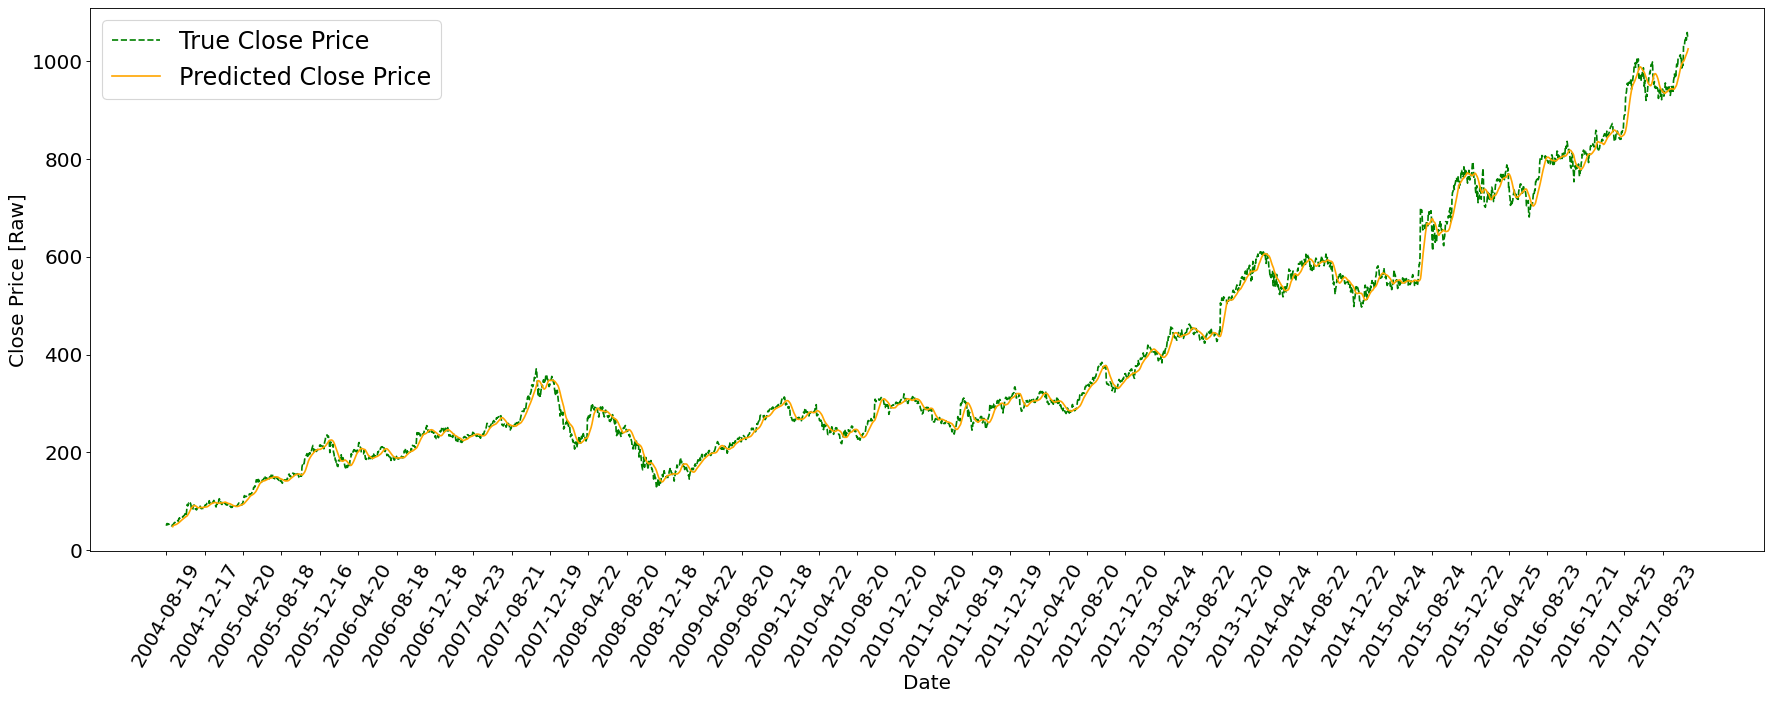

In [10]:
fig = plt.figure()
ax_left = fig.add_subplot()

plt.xticks(range(0,df.shape[0],28*3),df['Date'].loc[::28*3],rotation=60)
plt.xlabel('Date')

plt1 = ax_left.plot(range(df.shape[0]),df['Close'], color='green', linestyle ='--',label='True Close Price')
plt2 = ax_left.plot(range(window_size, train_size),std_avg_predictions,color='orange',label='Predicted Close Price')
ax_left.set_ylabel('Close Price [Raw]')

plts = plt1 + plt2 
labs = [p.get_label() for p in plts]
ax_left.legend(plts, labs, loc=0)

plt.show()